# Single-Cross 2
AUGUST 2023 : PUZZLE

Consider 3-space (i.e. $\mathbb{R}^3$) partitioned into a grid of unit cubes with faces defined by the planes of all points with at least one integer coordinate. For a fixed positive real number D, a random line segment of length D (chosen uniformly in location and orientation) is placed in this cubic lattice.

What length D maximizes the probability that the endpoints of the segment lie in orthogonally adjacent unit cubes (that is, the segment crosses exactly one integer-coordinate plane), and what is this maximal probability? Give your answer as a comma-separated pair of values to 10 significant places (e.g. “1.234567891,0.2468135792”).

#Solution

We start with some monte carlo simulation to estimate the optimal value and probabilities, and as a sanity check later on.

To do the simulation, we start by randomly sampling a point $(c_x,c_y,c_z)$ from $([0,1],[0,1],[0,1])$.

To sample a random orientation for the line segement, we note that we have to sample a z-axis displacement $d$ uniformly at random from $[-D,D]$, and then an angle $\phi$ from $[0,2\pi]$ for the angle of our chosen point on the xy plane. Let us call the angle our beam makes with the z-axis $\theta$, so $\theta = \cos^{-1}(d/D)$.

https://www.rojtberg.net/1985/how-to-generate-random-points-on-a-sphere/

The coordinates of the other end of the beam are then $(c_x + D\sin\theta \cos\phi, c_y + D\sin\theta \sin\phi, c_z + D\cos\theta)$

If the other end of the beam lies in the cube directly above our starting cube, i.e. with values $([0,1],[0,1],[1,2])$, we count it as a success.

By symmetry, the probability this happens is the same as the probability our beam lies in any one of the 6 cubes with faces adjacent to our original one, so we do not need to consider those other cases, and just multiply our probability of success by 6 to obtain the actual probabiltiy we want.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def simm(R):
    cx, cy, cz = np.random.rand(), np.random.rand(), np.random.rand()
    phi = 2 * np.pi * np.random.rand()
    elevation = np.random.rand()*2-1
    theta = np.arccos(elevation)
    x = cx + np.sin(theta) * np.cos(phi) * R
    y = cy + np.sin(theta) * np.sin(phi) * R
    z = cz + np.cos(theta) * R
    return int(2 > z > 1 and 0 < x < 1 and 0 < y < 1)
def monteCarlo(N,R):
    tot = 0.0
    for _ in range(N):
        tot += simm(R)
    return (tot * 6) / N

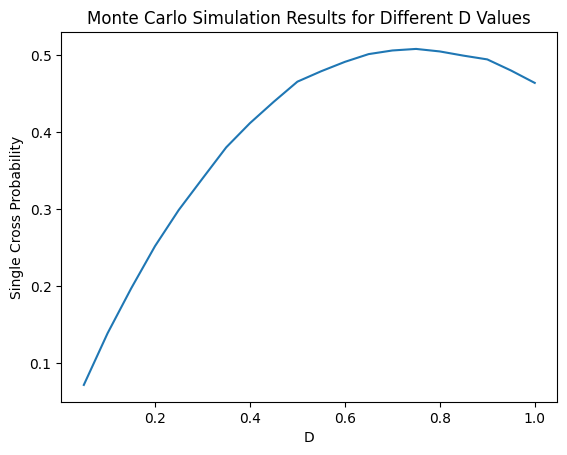

In [ ]:
# Define the range of R values and the number of Monte Carlo simulations
R_values = np.linspace(0.05, 1.0, 20)
num_simulations = 10**6

# Perform Monte Carlo simulations for each R value
results = []
for R in R_values:
    result = monteCarlo(num_simulations, R)
    results.append(result)

# Create a line plot
plt.plot(R_values, results)
plt.xlabel('D')
plt.ylabel('Single Cross Probability')
plt.title('Monte Carlo Simulation Results for Different D Values')
plt.show()

Our simulation shows that the optimal value for $D$ is somewhere between 0.6 and 0.8. We now try to derive a closed form value for our probability as a function of $D$.

For a fixed value of $0 < D < 1, 0 < \theta < \frac{\pi}{2}, 0 < \phi < \frac{\pi}{2}$, and initial starting position $(c_x, c_y, c_z)$ sampled uniformly at random from $([0,1],[0,1],[0,1])$ we have

$$P(0 < c_x + D\sin\theta \cos\phi < 1) = 1 - D\sin\theta \cos\phi$$

$$P(0 < c_y + D\sin\theta \sin\phi < 1) = 1 - D\sin\theta \sin\phi$$
$$P(1 < c_z + D\cos\theta < 2) = D\cos\theta $$

The probability that we will be within the cube directly above our starting one is the product of these probabilities.

Since we can sample $\theta$ by choosing a z-axis displacement $z$ uniformly at random from $[0,1]$, (instead of $[-D,D]$, but we will modify our answer appropriately at the end by multiplying by the right constant) and $\theta = \cos^{-1}(z)$. We have $\sin\theta = \sqrt{1-z^2}$.

Thus our integral is for the exact closed form probability is:

$$\frac{6D}{\pi}\int_{0}^{\frac{\pi}{2}} \int_{0}^{1} (1 - D\sqrt{1-z^2} \cos\phi)(1 - D\sqrt{1-z^2} \sin\phi)z dz d\phi$$

This evaluates to:

$$ \frac{D(3D^2-16D+6\pi)}{4\pi}$$

Which has a local maximum $\frac{D(3D^2-16D+6\pi)}{4\pi} \approx 0.509534602143008$ at $D \approx 0.745257209088079$

As a sanity check, we simulate the approximate value on our monte carlo simulation to see if we get the same result.

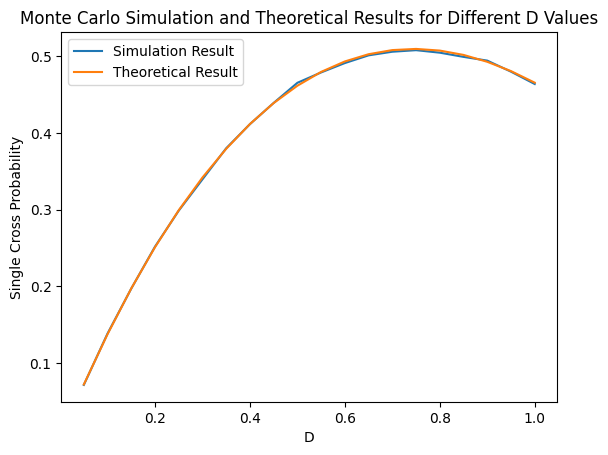

In [ ]:
results2 = []
for R in R_values:
    results2.append(R*(3*R**2-16*R+6*np.pi)/(4*np.pi))
# Create a line plot
plt.plot(R_values, results, label = 'Simulation Result')
plt.plot(R_values, results2, label = 'Theoretical Result')
plt.legend()
plt.xlabel('D')
plt.ylabel('Single Cross Probability')
plt.title('Monte Carlo Simulation and Theoretical Results for Different D Values')
plt.show()

In [ ]:
monteCarlo(1000000,0.7453)

0.511968